In [1]:
from keras.applications.vgg19 import VGG19
from keras.models import Sequential
from keras.utils import to_categorical
from keras.layers import Dense,Flatten
from keras.datasets import cifar10
import cv2
from keras import backend as K
import matplotlib.pyplot as plt
from keras.optimizers import SGD
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

Using TensorFlow backend.
C:\Users\Digesh\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Digesh\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Digesh\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Digesh\Anaconda3\lib\site-packages\tensorflow\python\framework\dtype

In [2]:
(x_train,y_train),(x_test,y_test) = cifar10.load_data() # load the data 

In [3]:
numberOfClass = 2000
y_train = to_categorical(y_train,numberOfClass)# y train and y test transform to categorical type
y_test = to_categorical(y_test,numberOfClass)
input_shape = x_train.shape[1:]

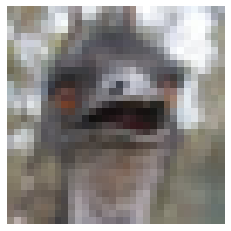

In [4]:
#Visualize 
plt.imshow(x_train[3119].astype(np.uint8)) #3119 is random number 
plt.axis("off") 
plt.show()

In [5]:
#increase dimension
def resize_img(img):
    numberOfImage = img.shape[0]
    new_array = np.zeros((numberOfImage,48,48,3))# first img shape is 32,32,3 but we want shape 48,48,3 
    for i in range(numberOfImage):
        new_array[i] = cv2.resize(img[i,:,:,:],(48,48))
    return new_array

In [6]:
print(x_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [7]:
x_train = x_train[0:5000]
x_test = x_test[0:5000]
x_train.shape

(5000, 32, 32, 3)

In [8]:
x_train = resize_img(x_train)
x_test = resize_img(x_test)

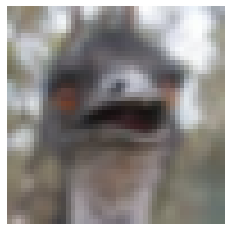

In [9]:
plt.figure()
plt.imshow(x_train[3119].astype(np.uint8)) #3119 is random number 
plt.axis("off") # close the axis
plt.show()

In [10]:
#VGG19
vgg19 = VGG19(include_top = False, weights = "imagenet",input_shape = (48,48,3))

Instructions for updating:
Colocations handled automatically by placer.


In [11]:
print(vgg19.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 48, 48, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 48, 48, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 48, 48, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 24, 24, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 24, 24, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 24, 24, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 12, 12, 128)       0         
__________

In [12]:
vgg19_layer_list =vgg19.layers
print(vgg19_layer_list)

[<keras.engine.input_layer.InputLayer object at 0x0000000016C7D908>, <keras.layers.convolutional.Conv2D object at 0x000000000D9AE748>, <keras.layers.convolutional.Conv2D object at 0x000000000D9AE198>, <keras.layers.pooling.MaxPooling2D object at 0x000000000D9EC828>, <keras.layers.convolutional.Conv2D object at 0x000000000D9EC198>, <keras.layers.convolutional.Conv2D object at 0x000000000DC4E550>, <keras.layers.pooling.MaxPooling2D object at 0x000000000DC6BC18>, <keras.layers.convolutional.Conv2D object at 0x000000000DC6B6A0>, <keras.layers.convolutional.Conv2D object at 0x000000000DCA1860>, <keras.layers.convolutional.Conv2D object at 0x000000000DCC0898>, <keras.layers.convolutional.Conv2D object at 0x000000000DCF5198>, <keras.layers.pooling.MaxPooling2D object at 0x000000000DD11828>, <keras.layers.convolutional.Conv2D object at 0x000000000DD119E8>, <keras.layers.convolutional.Conv2D object at 0x000000000DD45908>, <keras.layers.convolutional.Conv2D object at 0x000000000DD63160>, <keras.

In [13]:
model = Sequential()
for layer in vgg19_layer_list:
    model.add(layer)
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 48, 48, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 48, 48, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 24, 24, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 24, 24, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 24, 24, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 12, 12, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 12, 12, 256)       295168    
__________

In [14]:
#transfer learning
for layer in model.layers:
    layer.trainable = False

In [15]:
#fuly con layers
model.add(Flatten())
model.add(Dense(1024))
model.add(Dense(numberOfClass, activation="softmax"))
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 48, 48, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 48, 48, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 24, 24, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 24, 24, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 24, 24, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 12, 12, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 12, 12, 256)       295168    
__________

In [16]:
#compile part
model.compile( loss = "categorical_crossentropy", optimizer ="rmsprop", metrics =["accuracy"])

In [17]:
y_train.shape
y_train = y_train[0:5000]
y_test = y_test[0:5000]

In [1]:
history = model.fit(x_train,y_train, validation_split= 0.2, epochs = 15, batch_size = 1000)

NameError: name 'model' is not defined